In [ ]:
import torch 
import torch.nn as nn 
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
input_size = 784
hidden_size = 100
num_classes= 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

torch.Size([100, 1, 28, 28]) torch.Size([100])


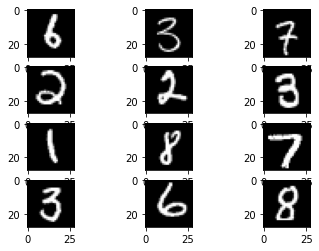

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='./data', train = True,transform = transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train =False,transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset= train_dataset,batch_size = batch_size, shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset= test_dataset,batch_size = batch_size, shuffle = False)

examples = iter(train_loader)
samples, labels =examples.next()
print(samples.shape, labels.shape)

for i in range(12):
  plt.subplot(4,3,i+1)
  plt.imshow(samples[i][0], cmap='gray')
#plt.show


In [ ]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end as we will implement the whole loss type differently
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [ ]:
# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Epoch [1/5], Step [100/600], Loss: 2.2915
Epoch [1/5], Step [200/600], Loss: 2.2643
Epoch [1/5], Step [300/600], Loss: 2.2609
Epoch [1/5], Step [400/600], Loss: 2.2246
Epoch [1/5], Step [500/600], Loss: 2.2285
Epoch [1/5], Step [600/600], Loss: 2.1904
Epoch [2/5], Step [100/600], Loss: 2.1650
Epoch [2/5], Step [200/600], Loss: 2.1393
Epoch [2/5], Step [300/600], Loss: 2.1423
Epoch [2/5], Step [400/600], Loss: 2.1070
Epoch [2/5], Step [500/600], Loss: 2.0829
Epoch [2/5], Step [600/600], Loss: 2.0758
Epoch [3/5], Step [100/600], Loss: 2.0234
Epoch [3/5], Step [200/600], Loss: 2.0180
Epoch [3/5], Step [300/600], Loss: 1.9826
Epoch [3/5], Step [400/600], Loss: 1.9282
Epoch [3/5], Step [500/600], Loss: 1.8808
Epoch [3/5], Step [600/600], Loss: 1.8828
Epoch [4/5], Step [100/600], Loss: 1.8606
Epoch [4/5], Step [200/600], Loss: 1.8669
Epoch [4/5], Step [300/600], Loss: 1.7882
Epoch [4/5], Step [400/600], Loss: 1.7769
Epoch [4/5], Step [500/600], Loss: 1.7131
Epoch [4/5], Step [600/600], Loss:

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

In [ ]:
# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Epoch [1/5], Step [100/600], Loss: 0.5538
Epoch [1/5], Step [200/600], Loss: 0.2563
Epoch [1/5], Step [300/600], Loss: 0.3184
Epoch [1/5], Step [400/600], Loss: 0.1850
Epoch [1/5], Step [500/600], Loss: 0.2303
Epoch [1/5], Step [600/600], Loss: 0.2747
Epoch [2/5], Step [100/600], Loss: 0.1941
Epoch [2/5], Step [200/600], Loss: 0.1875
Epoch [2/5], Step [300/600], Loss: 0.2089
Epoch [2/5], Step [400/600], Loss: 0.1641
Epoch [2/5], Step [500/600], Loss: 0.1494
Epoch [2/5], Step [600/600], Loss: 0.2163
Epoch [3/5], Step [100/600], Loss: 0.2439
Epoch [3/5], Step [200/600], Loss: 0.1147
Epoch [3/5], Step [300/600], Loss: 0.1132
Epoch [3/5], Step [400/600], Loss: 0.1270
Epoch [3/5], Step [500/600], Loss: 0.2398
Epoch [3/5], Step [600/600], Loss: 0.0972
Epoch [4/5], Step [100/600], Loss: 0.0896
Epoch [4/5], Step [200/600], Loss: 0.1185
Epoch [4/5], Step [300/600], Loss: 0.1122
Epoch [4/5], Step [400/600], Loss: 0.0415
Epoch [4/5], Step [500/600], Loss: 0.0340
Epoch [4/5], Step [600/600], Loss:

NOW LET'S IMPLEMENT IT USING NLL LOSS FUNCTION BUT NOW WE WILLL BE REQUIRED TO ADD ANOTHER LogSoftmax layer to it

In [ ]:
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
batch_size = 64

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,)),])

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='./data', train = True,transform = transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train =False,transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset= train_dataset,batch_size = batch_size, shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset= test_dataset,batch_size = batch_size, shuffle = False)

In [ ]:
dataiter = iter(train_loader) # creating a iterator
images, labels = dataiter.next() # creating images for image and lables for image number (0 to 9) 

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


PyTorch provides an easy way to build networks like this. By using nn.Sequential, a tensor is passed sequentially through operations.

In [ ]:
model=nn.Sequential(nn.Linear(784,128), # 1 layer:- 784 input 128 o/p
                    nn.ReLU(),          # Defining Regular linear unit as activation
                    nn.Linear(128,64),  # 2 Layer:- 128 Input and 64 O/p
                    nn.Tanh(),          # Defining Regular linear unit as activation
                    nn.Linear(64,10),   # 3 Layer:- 64 Input and 10 O/P as (0-9)
                    nn.LogSoftmax(dim=1) # Defining the log softmax to find the probablities for the last output unit
                  ) 

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): Tanh()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [ ]:
# defining the negative log-likelihood loss for calculating loss
criterion = nn.NLLLoss() 

In [ ]:
images, labels = next(iter(train_loader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL-loss

The autograd module automatically calculates the gradient of the tensor. The small change in the input weight that reflects the change in loss is called the gradient of that weight and is calculated using backpropagation. It is then used to update the weights by using a learning rate. It reduces the overall loss and trains the neural net

In [ ]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward() # to calculate gradients of parameter 
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

print('Initial weights - ', model[0].weight)

images, labels = next(iter(train_loader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass
output = model(images)
loss = criterion(output, labels)
# the backward pass and update weights
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0097,  0.0257, -0.0178,  ..., -0.0059,  0.0202,  0.0232],
        [ 0.0149,  0.0102,  0.0192,  ..., -0.0292, -0.0126,  0.0227],
        [ 0.0111, -0.0041,  0.0027,  ..., -0.0263,  0.0192, -0.0326],
        ...,
        [-0.0077, -0.0339,  0.0175,  ...,  0.0296,  0.0279,  0.0081],
        [-0.0203,  0.0051,  0.0183,  ...,  0.0032,  0.0101, -0.0050],
        [-0.0069,  0.0070,  0.0230,  ...,  0.0108,  0.0292,  0.0207]],
       requires_grad=True)
Gradient - tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [ ]:
time0 = time()
epochs = 15 # total number of iteration for training
running_loss_list= []
epochs_list = []

for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        # Flatenning MNIST images with size [64,784]
        images = images.view(images.shape[0], -1) 
    
        # defining gradient in each epoch as 0
        optimizer.zero_grad()
        
        # modeling for each image batch
        output = model(images)
        
        # calculating the loss
        loss = criterion(output, labels)
        
        # This is where the model learns by backpropagating
        loss.backward()
        
        # And optimizes its weights here
        optimizer.step()
        
        # calculating the loss
        running_loss += loss.item()
        
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(train_loader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.49316510715797895
Epoch 1 - Training loss: 0.18413351670797193
Epoch 2 - Training loss: 0.1284561393075565
Epoch 3 - Training loss: 0.09992842464002846
Epoch 4 - Training loss: 0.0804767858103982
Epoch 5 - Training loss: 0.06738451667137936
Epoch 6 - Training loss: 0.05669641059273278
Epoch 7 - Training loss: 0.048656132356422556
Epoch 8 - Training loss: 0.041214336930309486
Epoch 9 - Training loss: 0.03643270289308941
Epoch 10 - Training loss: 0.030739688300224804
Epoch 11 - Training loss: 0.026318009155911645
Epoch 12 - Training loss: 0.02298819043411454
Epoch 13 - Training loss: 0.019398515822732252
Epoch 14 - Training loss: 0.017204339078355477

Training Time (in minutes) = 1.8678260127703348


In [ ]:
def classify(img, ps):
    ''' 
    Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()
import numpy as np    

Predicted Digit = 7


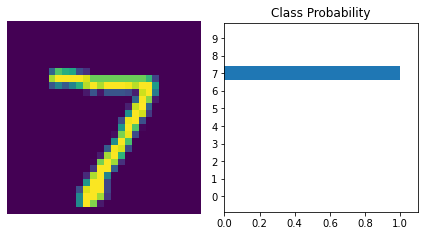

In [ ]:
images, labels = next(iter(test_loader))
# replace trainloader to check training accuracy.

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logpb = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
pb = torch.exp(logpb)
probab = list(pb.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
classify(img.view(1, 28, 28), pb)

In [ ]:
correct_count, all_count = 0, 0
for images,labels in test_loader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)

    with torch.no_grad():
        logps = model(img)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9785


NOW WITH ADAM

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

print('Initial weights - ', model[0].weight)

images, labels = next(iter(train_loader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass
output = model(images)
loss = criterion(output, labels)
# the backward pass and update weights
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0097,  0.0257, -0.0178,  ..., -0.0059,  0.0202,  0.0232],
        [ 0.0149,  0.0102,  0.0192,  ..., -0.0292, -0.0126,  0.0227],
        [ 0.0111, -0.0041,  0.0027,  ..., -0.0263,  0.0192, -0.0326],
        ...,
        [-0.0077, -0.0339,  0.0175,  ...,  0.0296,  0.0279,  0.0081],
        [-0.0203,  0.0051,  0.0183,  ...,  0.0032,  0.0101, -0.0050],
        [-0.0069,  0.0070,  0.0230,  ...,  0.0108,  0.0292,  0.0207]],
       requires_grad=True)
Gradient - tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [ ]:
time0 = time()
epochs = 15 # total number of iteration for training
running_loss_list= []
epochs_list = []

for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        # Flatenning MNIST images with size [64,784]
        images = images.view(images.shape[0], -1) 
    
        # defining gradient in each epoch as 0
        optimizer.zero_grad()
        
        # modeling for each image batch
        output = model(images)
        
        # calculating the loss
        loss = criterion(output, labels)
        
        # This is where the model learns by backpropagating
        loss.backward()
        
        # And optimizes its weights here
        optimizer.step()
        
        # calculating the loss
        running_loss += loss.item()
        
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(train_loader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.18991783885598015
Epoch 1 - Training loss: 0.12805385356183166
Epoch 2 - Training loss: 0.12871000591043963
Epoch 3 - Training loss: 0.127197500208079
Epoch 4 - Training loss: 0.13115563589919693
Epoch 5 - Training loss: 0.1291613669649982
Epoch 6 - Training loss: 0.1259581066513144
Epoch 7 - Training loss: 0.14134504251243638
Epoch 8 - Training loss: 0.1376389161627025
Epoch 9 - Training loss: 0.12564207488216206
Epoch 10 - Training loss: 0.13677222223312996
Epoch 11 - Training loss: 0.12889280329261826
Epoch 12 - Training loss: 0.13200003618219577
Epoch 13 - Training loss: 0.12952542334481248
Epoch 14 - Training loss: 0.13949380491151295

Training Time (in minutes) = 2.7060992399851482


In [ ]:
def classify(img, ps):
    ''' 
    Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()
import numpy as np    

the working for a sample digit.

Predicted Digit = 7


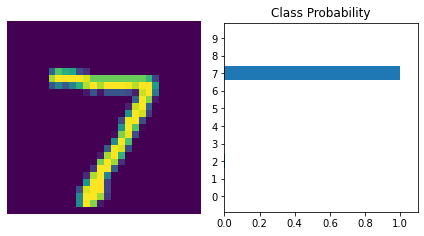

In [ ]:
images, labels = next(iter(test_loader))
# replace trainloader to check training accuracy.

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logpb = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
pb = torch.exp(logpb)
probab = list(pb.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
classify(img.view(1, 28, 28), pb)

In [ ]:
correct_count, all_count = 0, 0
for images,labels in test_loader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)

    with torch.no_grad():
        logps = model(img)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9543


CONCLUSION : DURING THIS EXPLORATION WE FIRST DEALT WITH DEVELOPING SHORTER HIDDEN LAYER FOR CROSS ENTROPY LOSS CASE BUT THEN DEVISED HIGHER LAYER MODEL BY USING SEQUENTIAL DIRECTLY AND IMPLEMENTING IT FOR SECOND TYPE OF LOSS AS WELL i.e. NLL loss.